<a href="https://colab.research.google.com/github/Vaheedha/NN-DL_ICP-5/blob/main/NN%26DL_ICP_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.layers import Input, Dense
from keras.models import Model


# size of encoded representations
encoding_dim = 32


# input placeholder
input_img = Input(shape=(784,))

encoded = Dense(encoding_dim, activation='relu')(input_img)

# decoded- lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)


# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])


from keras.datasets import mnist, fashion_mnist
import numpy as np

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train[:6000]
x_test = x_test[:1000]

#Converting into float
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.


#Setting Up data from 28*28 to 784 for the width & height of image
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

4422102/4422102 [==============================] - 0s 0us/step


In [2]:
#Fitting the model
autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))


Epoch 1/5
47/47 [==============================] - 5s 36ms/step - loss: 0.5696 - accuracy: 0.0020 - val_loss: 0.4643 - val_accuracy: 0.0020
Epoch 2/5
47/47 [==============================] - 1s 27ms/step - loss: 0.4235 - accuracy: 0.0075 - val_loss: 0.3966 - val_accuracy: 0.0070
Epoch 3/5
47/47 [==============================] - 2s 32ms/step - loss: 0.3820 - accuracy: 0.0082 - val_loss: 0.3751 - val_accuracy: 0.0120
Epoch 4/5
47/47 [==============================] - 1s 27ms/step - loss: 0.3643 - accuracy: 0.0083 - val_loss: 0.3607 - val_accuracy: 0.0100
Epoch 5/5
47/47 [==============================] - 1s 12ms/step - loss: 0.3513 - accuracy: 0.0075 - val_loss: 0.3497 - val_accuracy: 0.0120


In [3]:
#predicting on the test data
prediction = autoencoder.predict(x_test)


32/32 [==============================] - 0s 2ms/step


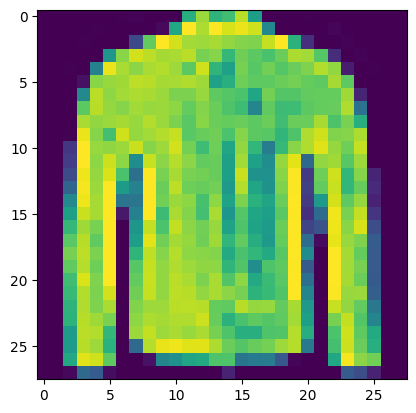

In [4]:
#Input Image
from matplotlib import pyplot as plt
plt.imshow(x_test[50].reshape(28,28))
plt.show()

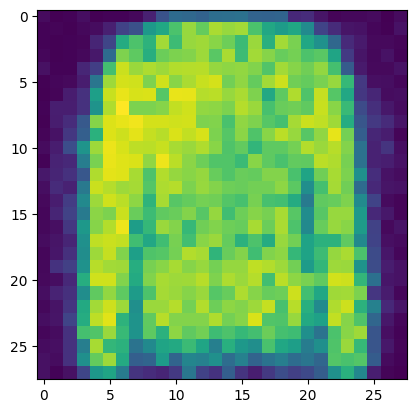

In [5]:
#reconstructed Image
from matplotlib import pyplot as plt
plt.imshow(prediction[50].reshape(28,28))
plt.show()

In [6]:
# ADDING ONE MORE HIDDEN LAYER

input_img = Input(shape=(784,))
#Adding hidden layer to encoding
hiddenLayer_en=Dense(512,activation='relu')(input_img)
encoded = Dense(encoding_dim, activation='relu')(hiddenLayer_en) #Undercomplete Encoding
#Adding hidden layer to decoding
hiddenLayer_de=Dense(512,activation='relu')(encoded)
decoded = Dense(784, activation='sigmoid')(hiddenLayer_de)


autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])


from keras.datasets import mnist, fashion_mnist
import numpy as np

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

#Converting into float & Scaling Data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

#Setting Up data from 28*28 to 784 for the width & height of image
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

#Fitting/training the model
autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/5
469/469 [==============================] - 14s 28ms/step - loss: 0.3220 - accuracy: 0.0134 - val_loss: 0.2929 - val_accuracy: 0.0201
Epoch 2/5
469/469 [==============================] - 16s 34ms/step - loss: 0.2856 - accuracy: 0.0217 - val_loss: 0.2833 - val_accuracy: 0.0251
Epoch 3/5
469/469 [==============================] - 14s 31ms/step - loss: 0.2791 - accuracy: 0.0277 - val_loss: 0.2795 - val_accuracy: 0.0257
Epoch 4/5
469/469 [==============================] - 16s 34ms/step - loss: 0.2760 - accuracy: 0.0308 - val_loss: 0.2772 - val_accuracy: 0.0297
Epoch 5/5
469/469 [==============================] - 27s 57ms/step - loss: 0.2740 - accuracy: 0.0331 - val_loss: 0.2756 - val_accuracy: 0.0316


313/313 [==============================] - 2s 5ms/step


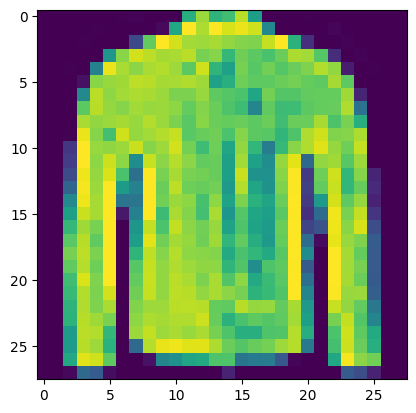

In [7]:
# Do the prediction on the test data and then visualize the reconstructed version of that test data. Also, visualize the same test data before reconstruction using Matplotlib

#predicting on the test data
prediction = autoencoder.predict(x_test)

#Input Image
from matplotlib import pyplot as plt
plt.imshow(x_test[50].reshape(28,28))
plt.show()

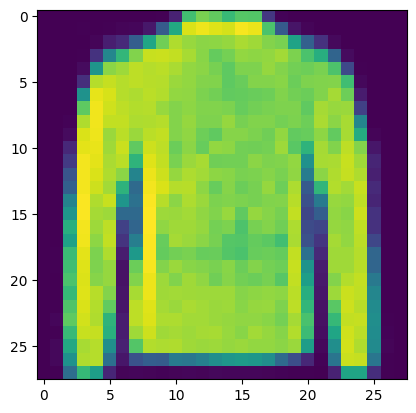

In [8]:
#reconstructed Image
from matplotlib import pyplot as plt
plt.imshow(prediction[50].reshape(28,28))
plt.show()

In [9]:
# Repeat the question 2 on the denoisening autoencoder

from keras.layers import Input, Dense
from keras.models import Model


# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats


# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img) #Undercomplete Encoding
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
     # this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])


from keras.datasets import mnist, fashion_mnist
import numpy as np

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train[:6000]
x_test = x_test[:1000]

#Converting into float & Scaling Data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.


#Setting Up data from 28*28 to 784 for the width & height of image
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))


In [10]:
#introducing noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

In [11]:
history = autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test_noisy))

Epoch 1/10
24/24 [==============================] - 1s 23ms/step - loss: 0.6465 - accuracy: 1.6667e-04 - val_loss: 0.5619 - val_accuracy: 0.0010
Epoch 2/10
24/24 [==============================] - 0s 15ms/step - loss: 0.5044 - accuracy: 0.0023 - val_loss: 0.4583 - val_accuracy: 0.0030
Epoch 3/10
24/24 [==============================] - 0s 14ms/step - loss: 0.4323 - accuracy: 0.0032 - val_loss: 0.4112 - val_accuracy: 0.0020
Epoch 4/10
24/24 [==============================] - 0s 17ms/step - loss: 0.4015 - accuracy: 0.0060 - val_loss: 0.3923 - val_accuracy: 0.0030
Epoch 5/10
24/24 [==============================] - 0s 16ms/step - loss: 0.3866 - accuracy: 0.0072 - val_loss: 0.3798 - val_accuracy: 0.0020
Epoch 6/10
24/24 [==============================] - 0s 15ms/step - loss: 0.3755 - accuracy: 0.0080 - val_loss: 0.3688 - val_accuracy: 0.0030
Epoch 7/10
24/24 [==============================] - 0s 17ms/step - loss: 0.3660 - accuracy: 0.0083 - val_loss: 0.3592 - val_accuracy: 0.0020
Epoch 8/1

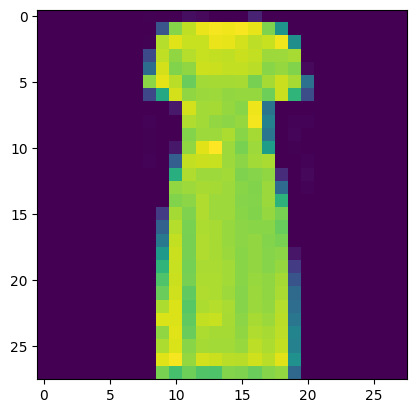

In [12]:
#Before applying Noise to data
from matplotlib import pyplot as plt
plt.imshow(x_train[50].reshape(28,28))
plt.show()

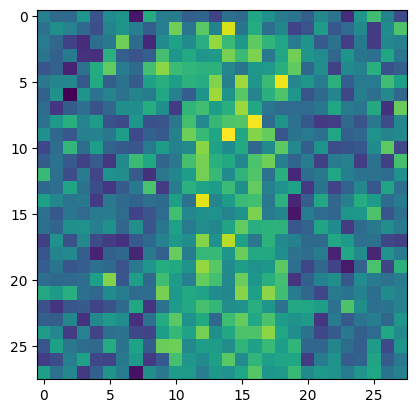

In [13]:
#After Applying Noise to data
from matplotlib import pyplot as plt
plt.imshow(x_train_noisy[50].reshape(28,28))
plt.show()

32/32 [==============================] - 0s 2ms/step


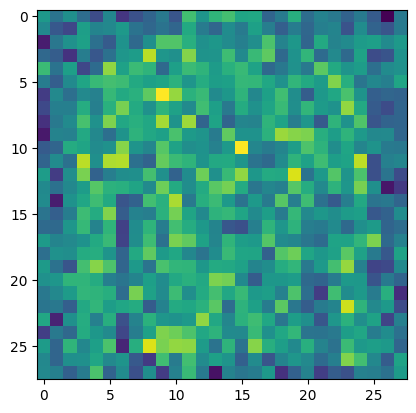

In [14]:
#predicting on the test data
prediction = autoencoder.predict(x_test_noisy) #prediction

#Input Image After Noise to be predicted
from matplotlib import pyplot as plt
plt.imshow(x_test_noisy[50].reshape(28,28))
plt.show()

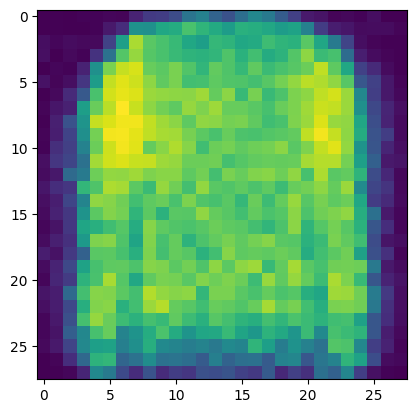

In [15]:
#reconstructed Image
from matplotlib import pyplot as plt
plt.imshow(prediction[50].reshape(28,28))
plt.show()

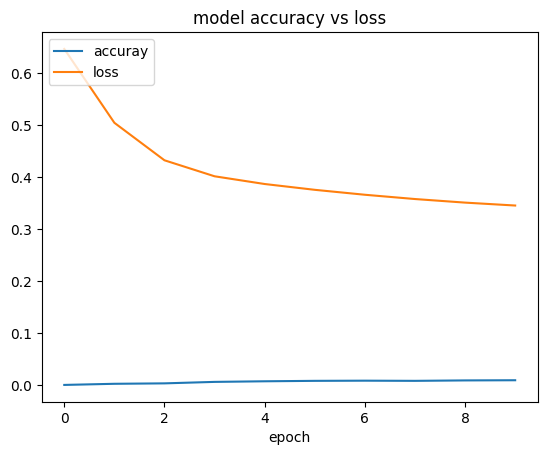

In [16]:
# plot loss and accuracy using the history object

autoencoder.metrics_names

import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy vs loss')
plt.xlabel('epoch')
plt.legend(['accuray','loss'], loc='upper left')
plt.show()
